In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import glob
import cv2
import random
import numpy as np
import matplotlib.pyplot as plt
import shutil
import os

In [6]:
daftar_huruf = glob.glob('/content/drive/MyDrive/AKSARA/Kerinci/*')
daftar_huruf_nama = [_+"/"+_.split('/')[-1]+".png" for _ in daftar_huruf]
daftar_huruf_kosong = []

for nama in daftar_huruf_nama:
  _ = cv2.imread(nama)
  print(nama.split('/')[-1], np.sum(255-_))

  if np.sum(255-_)==0:
    daftar_huruf_kosong.append(nama.split('/')[-1].split('.')[0])

KERINCI_LETTER_NGGA.png 346482
KERINCI_LETTER_NGA.png 288171
KERINCI_LETTER_NDA.png 282549
KERINCI_LETTER_NA.png 198291
KERINCI_LETTER_MPA.png 264165
KERINCI_LETTER_MBA.png 264519
KERINCI_LETTER_MA.png 253494
KERINCI_LETTER_LA.png 134877
KERINCI_LETTER_KA.png 147381
KERINCI_LETTER_JA.png 250995
KERINCI_LETTER_HA.png 182253
KERINCI_LETTER_GA.png 109191
KERINCI_LETTER_DA.png 184227
KERINCI_LETTER_CA.png 173574
KERINCI_LETTER_BA.png 124563
KERINCI_LETTER_A.png 207798
KERINCI_FIRST_ALTERNATE_VOWEL_SIGN_I.png 649662
KERINCI_CONSONANT_SIGN_NG.png 123852
KERINCI_CONSONANT_SIGN_H.png 498984
KERINCI_ALTERNATE_SIGN_VIRAMA.png 723285
KERINCI_VOWEL_SIGN_U.png 160335
KERINCI_VOWEL_SIGN_O.png 181140
KERINCI_VOWEL_SIGN_I.png 642252
KERINCI_VOWEL_SIGN_E.png 272349
KERINCI_SIGN_VIRAMA.png 247965
KERINCI_SECOND_ALTERNATE_VOWEL_SIGN_I.png 150711
KERINCI_LETTER_YA.png 263946
KERINCI_LETTER_VA.png 125781
KERINCI_LETTER_TA.png 65301
KERINCI_LETTER_SA.png 129240
KERINCI_LETTER_RA.png 224736
KERINCI_LETTER_PA

In [7]:
def autoCrop(this_image):
    image_data_bw = this_image.max(axis=2)
    non_empty_columns = np.where(image_data_bw.min(axis=0)<0.2)[0]
    non_empty_rows = np.where(image_data_bw.min(axis=1)<0.2)[0]
    cropBox = (min(non_empty_rows), max(non_empty_rows), min(non_empty_columns), max(non_empty_columns))

    image_data_new = this_image[cropBox[0]:cropBox[1]+1, cropBox[2]:cropBox[3]+1 , :]
    
    return image_data_new

In [8]:
daftar_huruf = glob.glob('/content/drive/MyDrive/AKSARA/Kerinci/*')
daftar_huruf_nama = [_+"/"+_.split('/')[-1]+".png" for _ in daftar_huruf]
daftar_huruf_kosong = []

for nama in daftar_huruf_nama:
  _ = cv2.imread(nama)
  print(nama.split('/')[-1], np.sum(255-_))
  _ = autoCrop(_)
  cv2.imwrite(nama, _)

KERINCI_LETTER_NGGA.png 346482
KERINCI_LETTER_NGA.png 288171
KERINCI_LETTER_NDA.png 282549
KERINCI_LETTER_NA.png 198291
KERINCI_LETTER_MPA.png 264165
KERINCI_LETTER_MBA.png 264519
KERINCI_LETTER_MA.png 253494
KERINCI_LETTER_LA.png 134877
KERINCI_LETTER_KA.png 147381
KERINCI_LETTER_JA.png 250995
KERINCI_LETTER_HA.png 182253
KERINCI_LETTER_GA.png 109191
KERINCI_LETTER_DA.png 184227
KERINCI_LETTER_CA.png 173574
KERINCI_LETTER_BA.png 124563
KERINCI_LETTER_A.png 207798
KERINCI_FIRST_ALTERNATE_VOWEL_SIGN_I.png 649662
KERINCI_CONSONANT_SIGN_NG.png 123852
KERINCI_CONSONANT_SIGN_H.png 498984
KERINCI_ALTERNATE_SIGN_VIRAMA.png 723285
KERINCI_VOWEL_SIGN_U.png 160335
KERINCI_VOWEL_SIGN_O.png 181140
KERINCI_VOWEL_SIGN_I.png 642252
KERINCI_VOWEL_SIGN_E.png 272349
KERINCI_SIGN_VIRAMA.png 247965
KERINCI_SECOND_ALTERNATE_VOWEL_SIGN_I.png 150711
KERINCI_LETTER_YA.png 263946
KERINCI_LETTER_VA.png 125781
KERINCI_LETTER_TA.png 65301
KERINCI_LETTER_SA.png 129240
KERINCI_LETTER_RA.png 224736
KERINCI_LETTER_PA

In [9]:
!pip install Augmentor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [11]:
import Augmentor

def perbanyak(ini, sebanyak_ini):
  p = Augmentor.Pipeline(source_directory=ini, output_directory='.')
  p.random_distortion(probability=1, grid_width=2, grid_height=2, magnitude=1)
  p.rotate(probability=0.7, max_left_rotation=6, max_right_rotation=6)
  p.zoom_random(probability=0.7, percentage_area=0.9)
  p.resize(probability=1, width=64, height=64)
  p.sample(sebanyak_ini)

In [12]:
kerinci = glob.glob("/content/drive/MyDrive/AKSARA/Kerinci/*")

for huruf in kerinci:
  perbanyak(huruf, 20)

Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Kerinci/KERINCI_LETTER_NGGA/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F0E91951DF0>: 100%|██████████| 20/20 [00:00<00:00, 74.64 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Kerinci/KERINCI_LETTER_NGA/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F0E91951040>: 100%|██████████| 20/20 [00:00<00:00, 75.69 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Kerinci/KERINCI_LETTER_NDA/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F0EA27348B0>: 100%|██████████| 20/20 [00:00<00:00, 75.90 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Kerinci/KERINCI_LETTER_NA/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F0E9195A790>: 100%|██████████| 20/20 [00:00<00:00, 69.56 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Kerinci/KERINCI_LETTER_MPA/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F0E91B3BF10>: 100%|██████████| 20/20 [00:00<00:00, 73.79 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Kerinci/KERINCI_LETTER_MBA/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F0E91970E20>: 100%|██████████| 20/20 [00:00<00:00, 71.08 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Kerinci/KERINCI_LETTER_MA/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F0E91973BE0>: 100%|██████████| 20/20 [00:00<00:00, 78.74 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Kerinci/KERINCI_LETTER_LA/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F0E91970250>: 100%|██████████| 20/20 [00:00<00:00, 80.02 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Kerinci/KERINCI_LETTER_KA/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F0E91973670>: 100%|██████████| 20/20 [00:00<00:00, 88.44 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Kerinci/KERINCI_LETTER_JA/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F0E919732B0>: 100%|██████████| 20/20 [00:00<00:00, 75.13 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Kerinci/KERINCI_LETTER_HA/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F0E91978F70>: 100%|██████████| 20/20 [00:00<00:00, 87.79 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Kerinci/KERINCI_LETTER_GA/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F0E91978550>: 100%|██████████| 20/20 [00:00<00:00, 82.08 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Kerinci/KERINCI_LETTER_DA/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F0E91978550>: 100%|██████████| 20/20 [00:00<00:00, 76.99 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Kerinci/KERINCI_LETTER_CA/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F0E91B3BAF0>: 100%|██████████| 20/20 [00:00<00:00, 81.52 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Kerinci/KERINCI_LETTER_BA/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F0E91A02AC0>: 100%|██████████| 20/20 [00:00<00:00, 78.58 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Kerinci/KERINCI_LETTER_A/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F0E9090ABE0>: 100%|██████████| 20/20 [00:00<00:00, 74.25 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Kerinci/KERINCI_FIRST_ALTERNATE_VOWEL_SIGN_I/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F0E90911AC0>: 100%|██████████| 20/20 [00:00<00:00, 79.35 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Kerinci/KERINCI_CONSONANT_SIGN_NG/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F0E9090AA90>: 100%|██████████| 20/20 [00:00<00:00, 74.07 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Kerinci/KERINCI_CONSONANT_SIGN_H/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F0E90916940>: 100%|██████████| 20/20 [00:00<00:00, 78.51 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Kerinci/KERINCI_ALTERNATE_SIGN_VIRAMA/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F0E9271A340>: 100%|██████████| 20/20 [00:00<00:00, 85.51 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Kerinci/KERINCI_VOWEL_SIGN_U/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F0E90916D60>: 100%|██████████| 20/20 [00:00<00:00, 72.35 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Kerinci/KERINCI_VOWEL_SIGN_O/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F0E9090FAF0>: 100%|██████████| 20/20 [00:00<00:00, 87.96 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Kerinci/KERINCI_VOWEL_SIGN_I/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F0E90916190>: 100%|██████████| 20/20 [00:00<00:00, 71.25 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Kerinci/KERINCI_VOWEL_SIGN_E/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F0E9091C910>: 100%|██████████| 20/20 [00:00<00:00, 70.71 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Kerinci/KERINCI_SIGN_VIRAMA/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F0E91949D90>: 100%|██████████| 20/20 [00:00<00:00, 70.92 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Kerinci/KERINCI_SECOND_ALTERNATE_VOWEL_SIGN_I/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F0E9091F400>: 100%|██████████| 20/20 [01:15<00:00,  3.76s/ Samples]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Kerinci/KERINCI_LETTER_YA/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F0E90928A00>: 100%|██████████| 20/20 [00:00<00:00, 80.44 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Kerinci/KERINCI_LETTER_VA/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F0E9091F400>: 100%|██████████| 20/20 [00:00<00:00, 78.95 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Kerinci/KERINCI_LETTER_TA/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F0E926DCF10>: 100%|██████████| 20/20 [00:00<00:00, 78.93 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Kerinci/KERINCI_LETTER_SA/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F0E919BBAC0>: 100%|██████████| 20/20 [00:00<00:00, 68.28 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Kerinci/KERINCI_LETTER_RA/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F0E90930F10>: 100%|██████████| 20/20 [00:00<00:00, 72.77 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Kerinci/KERINCI_LETTER_PA/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F0E90921D00>: 100%|██████████| 20/20 [00:00<00:00, 74.12 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Kerinci/KERINCI_LETTER_NYJA/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F0E90933100>: 100%|██████████| 20/20 [00:00<00:00, 72.68 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Kerinci/KERINCI_LETTER_NYCA/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F0E9092DE20>: 100%|██████████| 20/20 [00:00<00:00, 77.82 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Kerinci/KERINCI_LETTER_NYA/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F0E9091FCD0>: 100%|██████████| 20/20 [00:00<00:00, 83.74 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Kerinci/KERINCI_LETTER_NTA/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F0E90938610>: 100%|██████████| 20/20 [00:00<00:00, 67.46 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Kerinci/KERINCI_LETTER_NGSA/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F0E909338B0>: 100%|██████████| 20/20 [00:00<00:00, 78.35 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Kerinci/KERINCI_LETTER_NGHA/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F0E8F0C4F40>: 100%|██████████| 20/20 [00:00<00:00, 74.08 Samples/s]


In [ ]:
'''import shutil

for i in daftar_huruf_kosong:
  shutil.rmtree('/content/drive/MyDrive/AKSARA/Sunda/' + i)''' 

In [13]:
x = []
y = []

daftar_huruf = glob.glob('/content/drive/MyDrive/AKSARA/Kerinci/*')

for c, jenis_huruf in enumerate(daftar_huruf):
  list_huruf = glob.glob(jenis_huruf + '/*')
  for huruf in list_huruf:
    try:
      aksara = cv2.imread(huruf)
      aksara = aksara/255
      #aksara = autoCrop(aksara)
      if aksara.shape[0] == 0 or aksara.shape[1] == 1:
        continue
      else:
        aksara = cv2.resize(aksara, (64, 64))
        x.append(aksara)
        y.append(c)
    except:
      continue

In [14]:
len(x)

798

In [15]:
len(set(y))

38

In [16]:
798/38

21.0

In [17]:
z = list(zip(x,y))
random.shuffle(z)
x, y = zip(*z)
x = np.asarray(x).astype(float)
y = np.asarray(y)

In [ ]:
y.shape

(2142,)

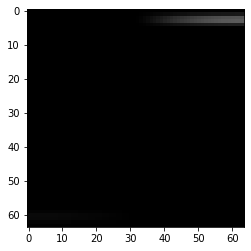

In [20]:
plt.imshow(x[200])

In [21]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation
from keras.preprocessing.image import ImageDataGenerator
from keras.metrics import accuracy, categorical_accuracy

model = Sequential()

model.add(Conv2D(2, (3, 3), input_shape = x.shape[1:], activation = 'relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(4, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(16, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(2, 2))

model.add(Flatten())

model.add(Dense(units = 38, activation = 'softmax'))

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
history = model.fit(x, y, batch_size = 2, epochs = 20, validation_split = 0.2)

Epoch 1/20
453/453 [==============================] - 4s 6ms/step - loss: 2.2596 - accuracy: 0.4503 - val_loss: 0.8635 - val_accuracy: 0.7885
Epoch 2/20
453/453 [==============================] - 3s 6ms/step - loss: 0.3865 - accuracy: 0.8885 - val_loss: 0.6821 - val_accuracy: 0.8414
Epoch 3/20
453/453 [==============================] - 3s 6ms/step - loss: 0.1885 - accuracy: 0.9294 - val_loss: 0.5674 - val_accuracy: 0.8678
Epoch 4/20
453/453 [==============================] - 2s 5ms/step - loss: 0.1300 - accuracy: 0.9503 - val_loss: 0.4971 - val_accuracy: 0.8899
Epoch 5/20
453/453 [==============================] - 3s 6ms/step - loss: 0.0680 - accuracy: 0.9757 - val_loss: 0.4442 - val_accuracy: 0.9163
Epoch 6/20
453/453 [==============================] - 3s 6ms/step - loss: 0.0616 - accuracy: 0.9757 - val_loss: 0.4582 - val_accuracy: 0.9075
Epoch 7/20
453/453 [==============================] - 3s 6ms/step - loss: 0.0498 - accuracy: 0.9812 - val_loss: 0.5133 - val_accuracy: 0.8943
Epoch 

In [22]:
print("->", 0)
history = model.fit(x, y, batch_size=2, epochs=2, validation_split=0.1)

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

for i in range(1, 20):
  z = list(zip(x,y))
  random.shuffle(z)
  del x, y
  x, y = zip(*z)
  x = np.asarray(x).astype(float)
  y = np.asarray(y)
  del z

  print("->", i)
  history = model.fit(x, y, batch_size=2, epochs=2, validation_split=0.1)
  
  accuracy = np.concatenate((accuracy, history.history['accuracy']), axis=0)
  val_accuracy = np.concatenate((val_accuracy, history.history['val_accuracy']), axis=0)
  loss = np.concatenate((loss, history.history['loss']), axis=0)
  val_loss = np.concatenate((val_loss, history.history['val_loss']), axis=0)

-> 0
Epoch 1/2
359/359 [==============================] - 4s 8ms/step - loss: 1.9988 - accuracy: 0.4554 - val_loss: 0.4464 - val_accuracy: 0.8250
Epoch 2/2
359/359 [==============================] - 3s 7ms/step - loss: 0.4304 - accuracy: 0.8649 - val_loss: 0.3102 - val_accuracy: 0.8750
-> 1
Epoch 1/2
359/359 [==============================] - 3s 9ms/step - loss: 0.2755 - accuracy: 0.9081 - val_loss: 0.3981 - val_accuracy: 0.8750
Epoch 2/2
359/359 [==============================] - 4s 10ms/step - loss: 0.2848 - accuracy: 0.8969 - val_loss: 0.3254 - val_accuracy: 0.9000
-> 2
Epoch 1/2
359/359 [==============================] - 3s 7ms/step - loss: 0.2227 - accuracy: 0.9220 - val_loss: 0.3149 - val_accuracy: 0.8625
Epoch 2/2
359/359 [==============================] - 3s 7ms/step - loss: 0.2009 - accuracy: 0.9192 - val_loss: 0.2701 - val_accuracy: 0.8500
-> 3
Epoch 1/2
359/359 [==============================] - 3s 8ms/step - loss: 0.1935 - accuracy: 0.9164 - val_loss: 0.4018 - val_accuracy:

In [27]:
model.save_weights("Model_Kerinci_FIX.h5")

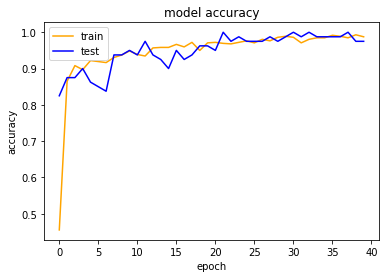

In [23]:
plt.plot(accuracy, 'orange', val_accuracy, 'blue')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

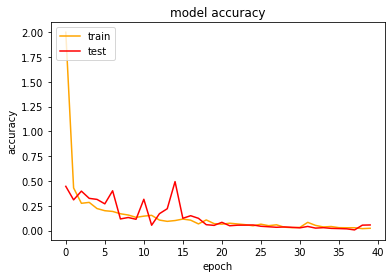

In [24]:
plt.plot(loss, 'orange', val_loss, 'red')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [25]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = model.predict(x[-1000:])
y_pred = np.argmax(y_pred, axis=1)

print(accuracy_score(y_pred, y[-1000:]))
cm = confusion_matrix(y_pred, y[-1000:])
print(cm)

print(classification_report(y_pred, y[-1000:]))

25/25 [==============================] - 1s 28ms/step
0.9887218045112782
[[21  0  0 ...  0  0  0]
 [ 0 21  0 ...  0  0  0]
 [ 0  0 21 ...  0  0  0]
 ...
 [ 0  0  0 ... 21  0  0]
 [ 0  0  0 ...  0 21  0]
 [ 0  0  0 ...  0  0 21]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        21
           3       1.00      1.00      1.00        21
           4       1.00      1.00      1.00        21
           5       1.00      1.00      1.00        21
           6       1.00      1.00      1.00        21
           7       1.00      1.00      1.00        21
           8       1.00      1.00      1.00        21
           9       1.00      1.00      1.00        21
          10       1.00      1.00      1.00        21
          11       1.00      1.00      1.00        21
          12       1.00      1.00      1.00        21
          13  

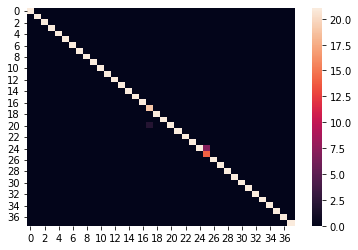

In [26]:
import seaborn as sns

sns.heatmap(cm)